<a href="https://colab.research.google.com/github/chayvw18/Deep-Learning-PyTorch/blob/main/ANN_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/MyDrive/Deep-Learning/ANN

/content/drive/MyDrive/Deep-Learning/ANN


**Artificial Neural Netowrk**
<br>
Thr Perceptron, The weighted sum, dot prodcut, linear operations vs non linear
<br>
Linear models can only solve non linearly separable problems, where you can acheive the results by drawing a straight line through two different groups(Regression ANOVA, GLM, Factor Analysis)
<br>
Nonlinear models can solve more complex problems
<br>
SGN/Signum functipm outputs 1 for any positive numbers and -1for any negative numbers and is a nonlinear function
<br>
SGN is not a useful for applications in deep learning, because of its limited bandwith.
<br>
```
yhat = σ(xTw)
```
note it has both a linear and nonlinear function
<br>
**Math of Deep Learning**
<br>
* yhat - output
* σ - activation function / nonlinearity
* xTw - dot product/  linear weighted sum
* x - inputs w  - weights
*
<br>
The bias term aka the intercept from a GLM or regression, but it allows the best fit line not have to pass through the origin and gives you the opportunity to draw separating hyper planes or lines that can pass through the Y axis anywhere
<br>
*Do you need a bias term?* You do not always need a bias term, you can also transform the data to be mean centered
<br>
Pytorch will always include the bias term by default
<br>
The Perceptron with the bias term , will have all the inputs and bias term feed into the operation/ computation node

```
yhat = σ(xTw + bw0)

```
you can set the bias to be any value and the w0 will be a parameter that the model optimizes. Implicitly we set the bias term to 1 and are left wit the two constants w0.
<br>
we need w0 because this bias intercept term becuase it allows us to fit any arbitrary data poistioned anywhere in the plane
<br>



**Geometric View of ANN**
<br>
*Feature Space* A geometric representation of the data, where each feature is an axis and each observation is a coordinate
<br>
*Separating Hyperplane* a boundary that binzarizes and categorizes data. It is used as a decision boundary *where the function = 0*
<br>
**Activation Function**
<br>
An activation function is a function that maps an input , which is the output of the linear part of the model, onto a output , which is the final output of the model
<br>
Generally the output of the linear part of the model is the input into this nonlinear activation function, and from there gets mapped onto some output value yhat
<br>
*Activation Functions* Sigmoid, Hyperbolic Tangent, ReLU
<br>
Generally sigmoid is used for the final output of the model, and HT and ReLU are used for nodes in the middle of the model. They are all nonlinear
<br>
The nodes are linear coming in and nonlnear coming out
*Problem how to pick the right weights?*
<br>
**Solution: Learn from the data! Via back-propagation** fancy term for gradient decent
<br>
**Errors Loss Cost**
<br>
yhat - model prediction y - reality / target variable
<br>
The *error* is the difference between yhat and y and can be binarize the error to 0 or 1
<br>
Binarized error is easier to interpet but less sensitive to the size of the error
<br>
The continuous error is more sensitive but are signed
<br>
The learning is based on the continous error but evaluatng model perfromance , both during and after training are based on binarizing the errors
<br>
The errors are used to generate losses most loss functions are variants of *Mean Sqaured Error* and *Cross Entropy*
<br>
MSE is used for continuous data when the output is a numerical prediction e.g., height, house price, temperature
<br>
```
mse = 1/2(yhat - y)**2 we compute the derivative ans this is also a polynomial and the **2 comes down and cancels the 2 in 1/2
```
Cross Entropy(logistic) used for categorival data when the output is a probability e.g., presence of disease, animal in picture, text sentiment
```
logistic = -(y log(yhat) + (1-y)log(1-yhat) the negative sign helps interpret the result
```
```
cost function 1/n ∑(yhati, yi)
```
the cost function is used an optimization criterion in the training
<br>
The goal of deep learning is to find the set of weights that minimizes the losses / cost function
<br>
W argmin 𝔍

<br>
**Why train on cost and not loss**
<br>
Training on each sample is time consuming and may lead to overfitting
<br>
Averaging over too many samples may decrease sensitivity
<br>
Good solution is to train the model in 'batches' of samples
<br>


**Simple Regression**
<br>
mean to predict one continuous variable from another
<br>
y = β0 + β1 xi + ϵi
<br>
the intercept term β0 is the same as the bias term in the percentron
<br>
and the coefficient and the independent (β1 xi) varibale is exactly the same as xTw
<br>
the key difference in a statistical regression and a deep learning percptron is the sigma σ activation function, which is a non linear function
<br>
*regression can be looked at as the linear part of the perceptron model*
<br>
the residual term , writtien explicitly written into the rgression , is incorporated into the perceptron but used elsewhere

In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-1-cfed14e462ba>:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


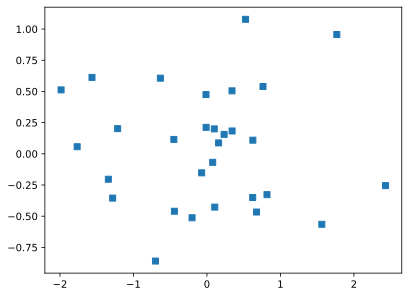

In [2]:
#create data

N = 30
x = torch.randn(N, 1)
y = torch.randn(N, 1)/2

#plot
plt.plot(x, y, 's')
plt.show()

In [4]:
#build model

ANNreg = nn.Sequential(
    nn.Linear(1,1), #input layer 1 input 1 output
    nn.ReLU(), #nonlinear activation function
    nn.Linear(1,1) #output layer 1 input and 1 output
)

ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [5]:
#learning rate
learningRate = .05

# loss function
lossfun = nn.MSELoss()

#optimizer (the flavor of gradient descent to implment)
optimizer = torch.optim.SGD(ANNreg.parameters(), lr=learningRate) #SGD stochastic gradient descent

In [6]:
#train the model
numephocs = 500

losses = torch.zeros(numephocs)

#train the model
for ephi in range(numephocs):

  #forward pass
  yhat = ANNreg(x)

  #compute loss
  loss = lossfun(yhat, y)
  losses[ephi] = loss

  # backdprop
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


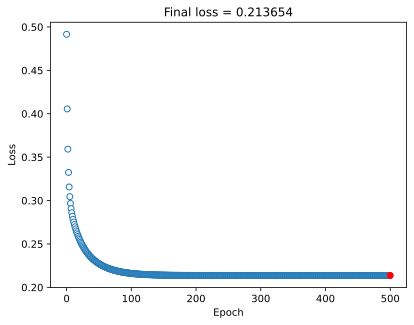

In [8]:
#show the losses
#final forward pass
predictions = ANNreg(x)

#final loss (MSE)
testloss = (predictions - y).pow(2).mean()

plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
plt.plot(numephocs, testloss.detach(), 'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss = %g' %testloss.item())
plt.show()

In [9]:
testloss.item()

0.2136535793542862

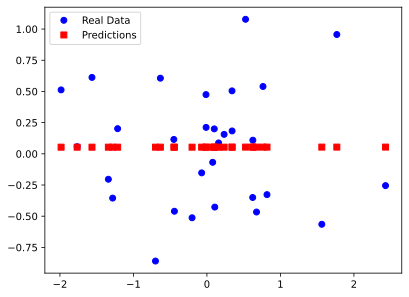

In [11]:
#plt the data
plt.plot(x, y, 'bo', label='Real Data')
plt.plot(x, predictions.detach(), 'rs', label='Predictions')
plt.legend()
plt.show()

**Should we use DL for statistics?**
<br>
Traditional statistical models tend to work better on smaller datasets, are better mathmatically characterized and more interpretable and guranteed optimal solutions
